In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/ViniciusLisboa07/analise-carga-tributaria

fatal: destination path 'analise-carga-tributaria' already exists and is not an empty directory.


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df = pd.read_csv('/content/analise-carga-tributaria/base-de-incidência.csv',
                      sep=';', encoding='utf-8')

In [ ]:
df.head()

,Ano-calendário,Código da Receita Tributária,Descrição,Valor da Receita Tributária,Percentual do PIB,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2002,0.00,Total da Receita Tributária,"477725,6437",1,NaN,NaN,NaN,NaN
1,2002,1000.00,Tributos sobre a Renda,"97010,59205","0,203067584",NaN,NaN,NaN,NaN
2,2002,1100.00,Pessoa Física,"28577,14573","0,059819158",NaN,NaN,NaN,NaN
3,2002,1100.01,IRPF,"4078,31919","0,008536948",NaN,NaN,NaN,NaN
4,2002,1100.02,IRRF - Trabalho União,"16417,12615","0,034365177",NaN,NaN,NaN,NaN


Tratando dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano-calendário                2120 non-null   int64  
 1   Código da Receita Tributária  2120 non-null   float64
 2   Descrição                     2120 non-null   object 
 3   Valor da Receita Tributária   2120 non-null   object 
 4   Percentual do PIB             2120 non-null   object 
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
 7   Unnamed: 7                    0 non-null      float64
 8   Unnamed: 8                    0 non-null      float64
dtypes: float64(5), int64(1), object(3)
memory usage: 149.2+ KB


Utiliza apenas as colunas necessárias, remove a coluna "Total" que já existe no dataset para efetuar a soma APENAS com os valores que estão no dataset e converte a coluna 'Valor da Receita Tributária' para bilhões, visto que os valores são muito grandes e todos na casa dos bilhões.

In [ ]:
new_df = df[['Ano-calendário', 'Código da Receita Tributária', 'Descrição', 'Valor da Receita Tributária', 'Percentual do PIB']]
new_df = new_df[new_df['Descrição'] != 'Total da Receita Tributária']
new_df['Valor da Receita Tributária'] = new_df['Valor da Receita Tributária'].str.replace(',', '').astype(float)
new_df = new_df[new_df['Valor da Receita Tributária'] > 0]
new_df

,Ano-calendário,Código da Receita Tributária,Descrição,Valor da Receita Tributária,Percentual do PIB
1,2002,1000.00,Tributos sobre a Renda,9701059205.00,"0,203067584"
2,2002,1100.00,Pessoa Física,2857714573.00,"0,059819158"
3,2002,1100.01,IRPF,407831919.00,"0,008536948"
4,2002,1100.02,IRRF - Trabalho União,1641712615.00,"0,034365177"
5,2002,1100.03,IRRF - Estados,5219355449.00,"0,010925424"
...,...,...,...,...,...
2110,2021,5200.01,IOF,4902380965.00,"0,016721719"
2111,2021,9000.00,Outros Tributos,1619486226.00,"5,52397E-05"
2112,2021,9000.01,Receita da Dívida Ativa Outros Trib e Contrib,27250904.00,"9,29512E-08"
2116,2021,9000.06,Reserva Global de Reversão,1983209596.00,"6,76461E-06"


#Tipos de dados do novo dataset

In [ ]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 1 to 2117
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano-calendário                1963 non-null   int64  
 1   Código da Receita Tributária  1963 non-null   float64
 2   Descrição                     1963 non-null   object 
 3   Valor da Receita Tributária   1963 non-null   float64
 4   Percentual do PIB             1963 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 92.0+ KB
None


Verificando se existem valores NaN na coluna

In [ ]:
valores_nan = df[df['Valor da Receita Tributária'].isnull()]
valores_nan

,Ano-calendário,Código da Receita Tributária,Descrição,Valor da Receita Tributária,Percentual do PIB,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8


Dados estatísticos por ano

In [ ]:
grupo_por_ano = new_df.groupby('Ano-calendário')['Valor da Receita Tributária']

media_por_ano = grupo_por_ano.mean()
mediana_por_ano = grupo_por_ano.median()
desvio_padrao_por_ano = grupo_por_ano.std()

resultados = pd.DataFrame({
    'Média': media_por_ano.apply(lambda x: '{:.2f} bilhões'.format(x / 1_000_000_000)),
    'Mediana': mediana_por_ano.apply(lambda x: '{:.2f} bilhões'.format(x / 1_000_000_000)),
    'Desvio Padrão': desvio_padrao_por_ano.apply(lambda x: '{:.2f} bilhões'.format(x / 1_000_000_000))
})

print(resultados)

                       Média       Mediana Desvio Padrão
Ano-calendário                                          
2002            3.54 bilhões  2.67 bilhões  2.82 bilhões
2003            3.25 bilhões  2.41 bilhões  2.74 bilhões
2004            3.45 bilhões  2.64 bilhões  2.73 bilhões
2005            3.65 bilhões  2.92 bilhões  2.82 bilhões
2006            3.40 bilhões  3.06 bilhões  2.76 bilhões
2007            3.22 bilhões  2.65 bilhões  2.61 bilhões
2008            3.41 bilhões  2.50 bilhões  2.83 bilhões
2009            3.17 bilhões  2.31 bilhões  2.71 bilhões
2010            3.67 bilhões  2.66 bilhões  2.88 bilhões
2011            3.18 bilhões  2.43 bilhões  2.83 bilhões
2012            3.46 bilhões  3.09 bilhões  2.84 bilhões
2013            3.40 bilhões  2.92 bilhões  2.71 bilhões
2014            3.09 bilhões  2.59 bilhões  2.51 bilhões
2015            3.26 bilhões  2.65 bilhões  2.73 bilhões
2016            2.92 bilhões  2.08 bilhões  2.55 bilhões
2017            3.23 bilhões  2

#Total dos tributos

In [ ]:
total_por_ano = new_df.groupby('Ano-calendário')['Valor da Receita Tributária'].sum()

print(total_por_ano)

Ano-calendário
2002   350451409103.00
2003   325128625964.00
2004   341588653058.00
2005   361470091183.00
2006   340271576550.00
2007   322272636595.00
2008   334541150861.00
2009   307662351348.00
2010   356353426889.00
2011   324392391111.00
2012   339037092885.00
2013   336722109852.00
2014   315286346172.00
2015   322751224229.00
2016   283494421546.00
2017   316608469210.00
2018   300365828346.00
2019   299332332664.00
2020   302253121537.00
2021   271643041418.00
Name: Valor da Receita Tributária, dtype: float64


#Leitura simplificada

In [ ]:
bilhoes = new_df[['Ano-calendário', 'Descrição', 'Valor da Receita Tributária']]
bilhoes['Valor da Receita Tributária'] = bilhoes['Valor da Receita Tributária'] / 1_000_000_000
total = bilhoes.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().round(2)
total_bilhoes = (total).astype(str) + ' bilhões'
print(total_bilhoes)

Ano-calendário
2002    350.45 bilhões
2003    325.13 bilhões
2004    341.59 bilhões
2005    361.47 bilhões
2006    340.27 bilhões
2007    322.27 bilhões
2008    334.54 bilhões
2009    307.66 bilhões
2010    356.35 bilhões
2011    324.39 bilhões
2012    339.04 bilhões
2013    336.72 bilhões
2014    315.29 bilhões
2015    322.75 bilhões
2016    283.49 bilhões
2017    316.61 bilhões
2018    300.37 bilhões
2019    299.33 bilhões
2020    302.25 bilhões
2021    271.64 bilhões
Name: Valor da Receita Tributária, dtype: object


<ipython-input-94-6a5ec3e1b954>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilhoes['Valor da Receita Tributária'] = bilhoes['Valor da Receita Tributária'] / 1_000_000_000


# Calculo da receita média e mediana de tributos

In [ ]:
total_bilhoes = total_bilhoes.str.replace(' bilhões', '').astype(float)

media = total_bilhoes.mean()
mediana = total_bilhoes.median()

print(f"Média dos tributos: {media:.2f} bilhoes")
print(f"Mediana dos tributos: {mediana:.2f} bilhoes")

Média dos tributos: 322.58 bilhoes
Mediana dos tributos: 323.57 bilhoes


#Gráfico do total da receita por ano

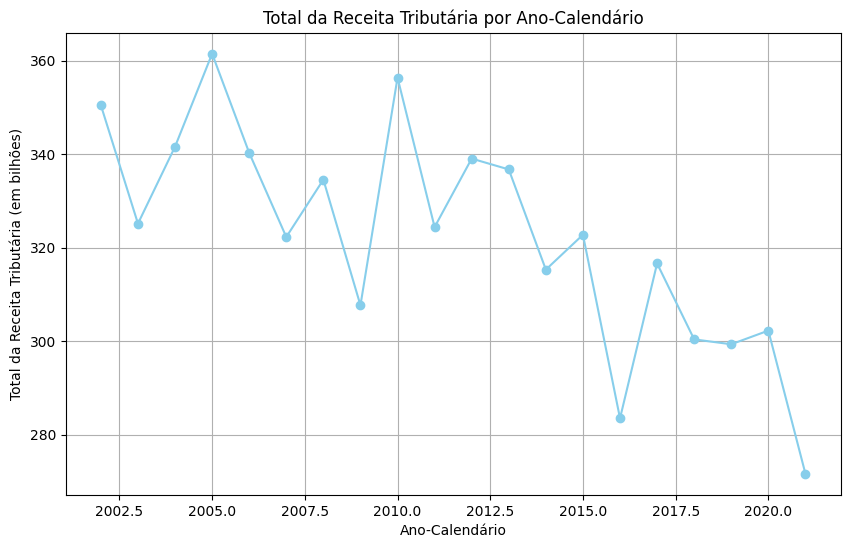

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(total.index, total.values, marker='o', color='skyblue', linestyle='-')
plt.title('Total da Receita Tributária por Ano-Calendário')
plt.xlabel('Ano-Calendário')
plt.ylabel('Total da Receita Tributária (em bilhões)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Gráfico do valor total da receita por cada categoria tributária

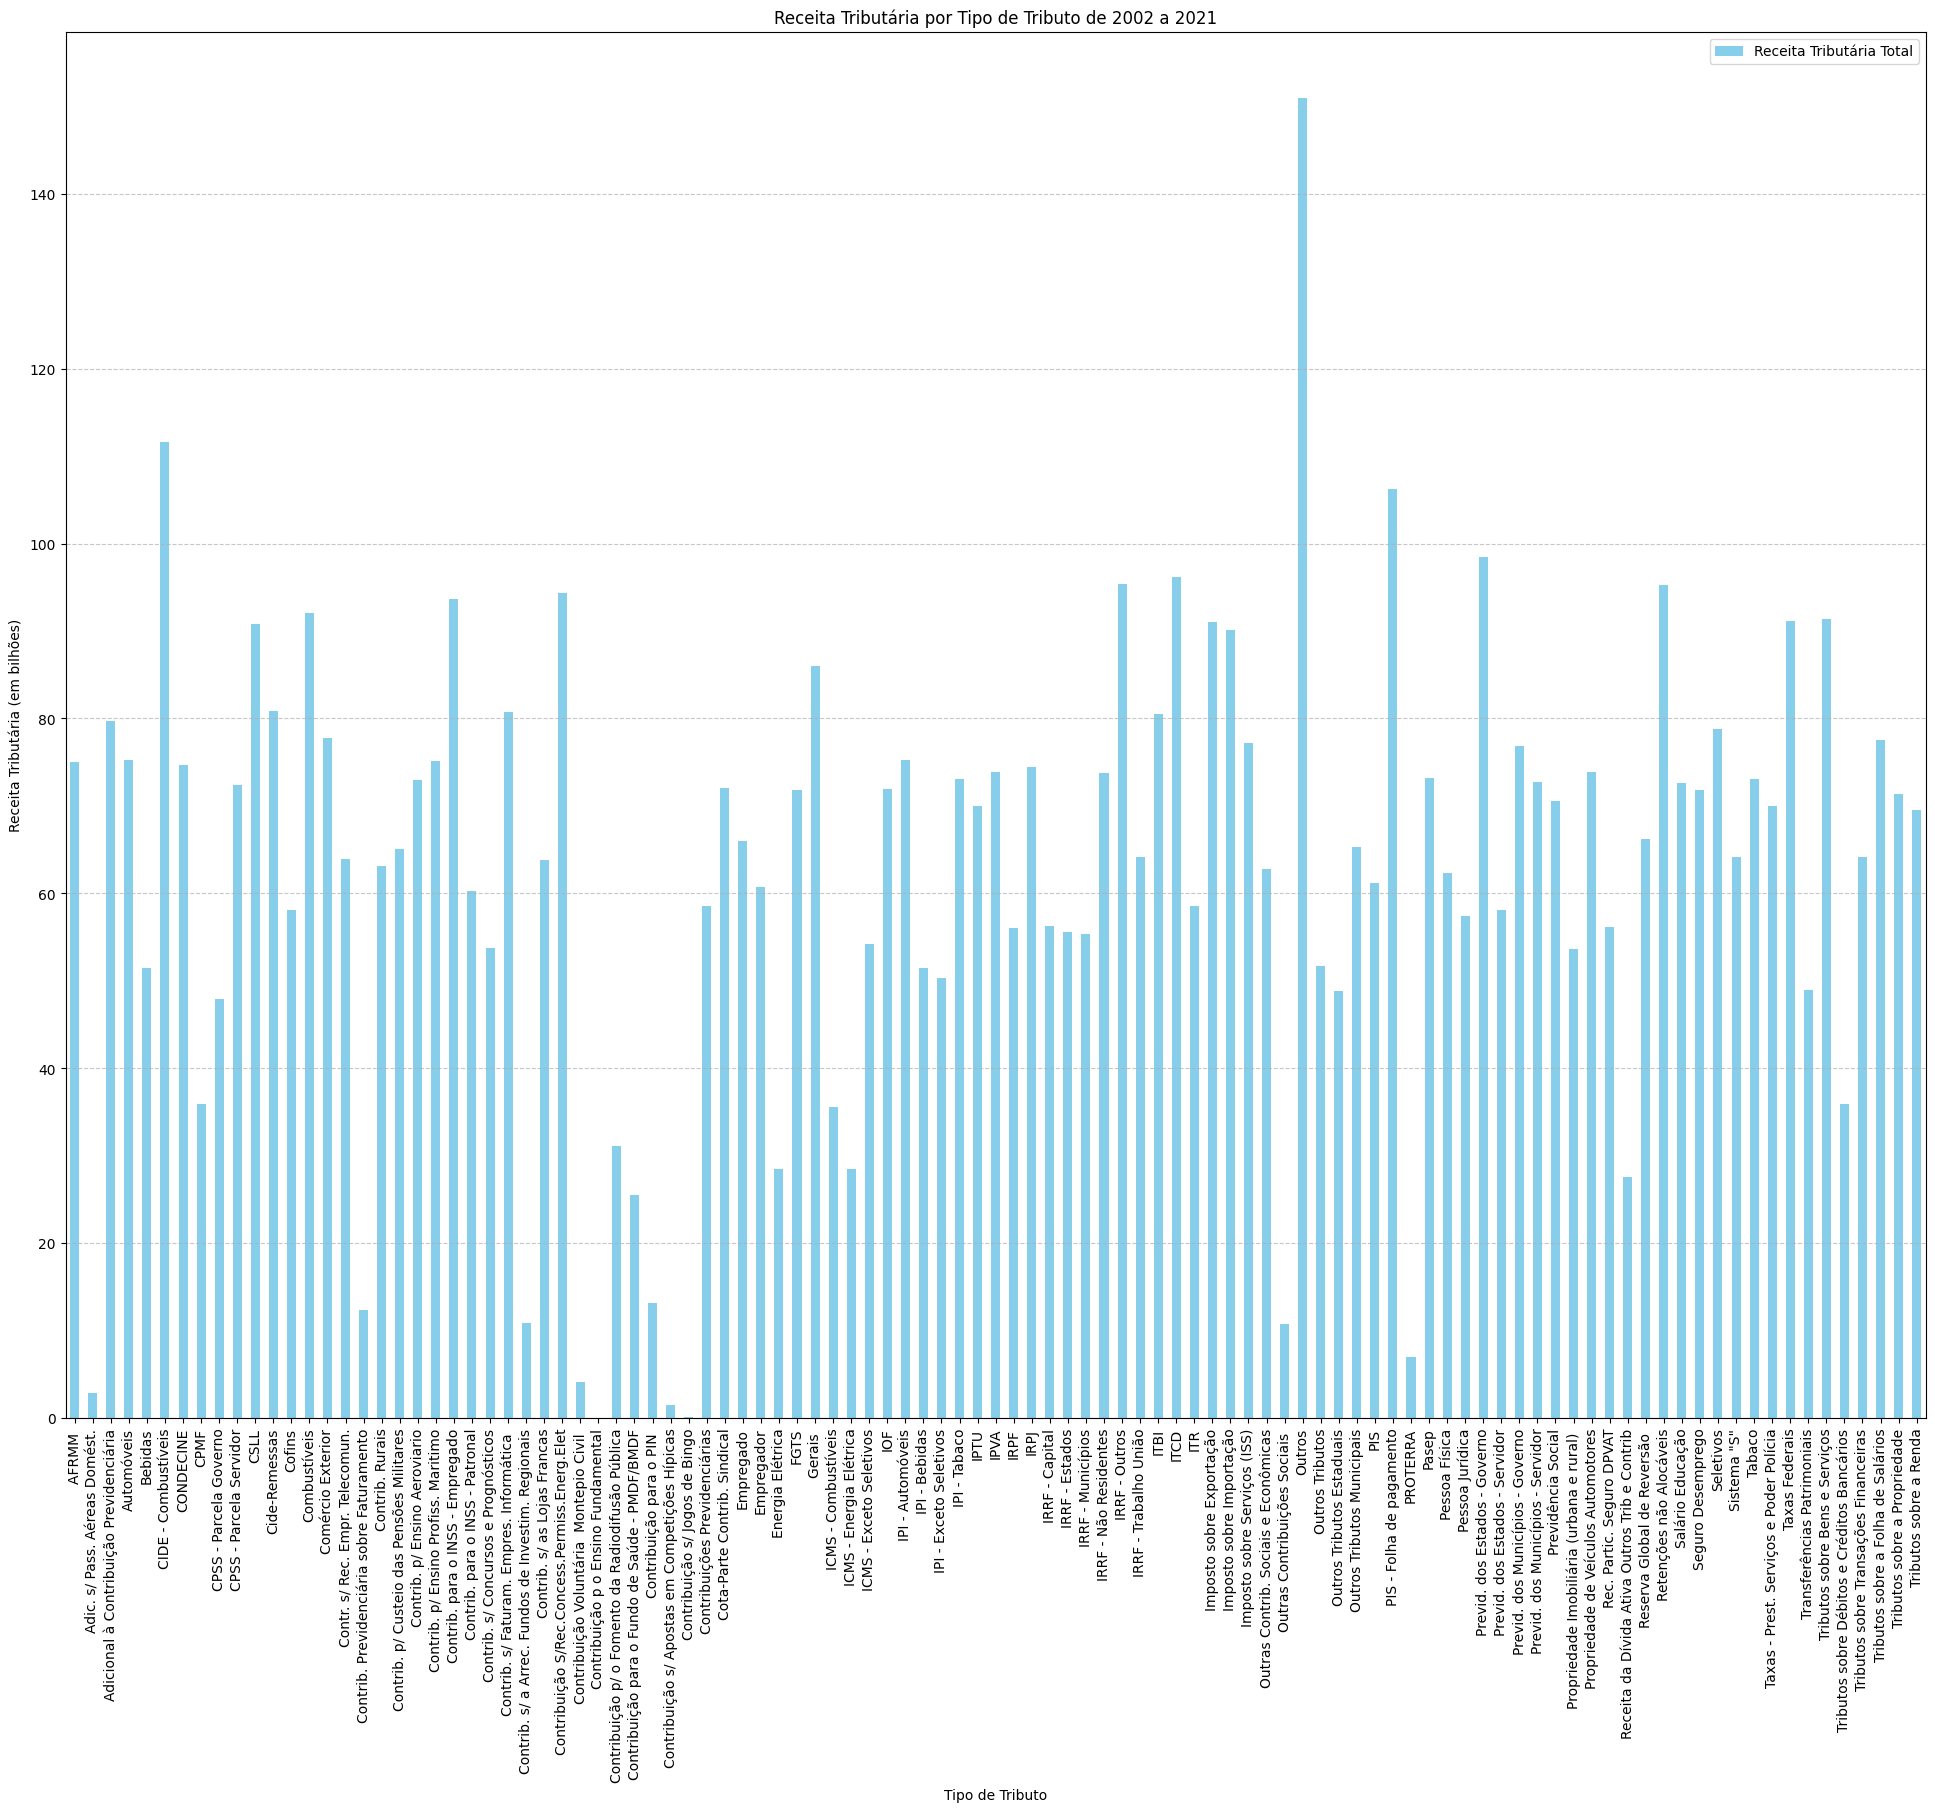

In [ ]:
receita_total_por_descricao = bilhoes.groupby('Descrição')['Valor da Receita Tributária'].sum()

plt.figure(figsize=(24, 18))
receita_total_por_descricao.plot(kind='bar', stacked=True, color='skyblue')
plt.title('Receita Tributária por Tipo de Tributo de 2002 a 2021')
plt.xlabel('Tipo de Tributo')
plt.ylabel('Receita Tributária (em bilhões)')
plt.xticks(rotation=90)
plt.legend(['Receita Tributária Total'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico dos 10 maiores valores total da receita por cada categoria tributária

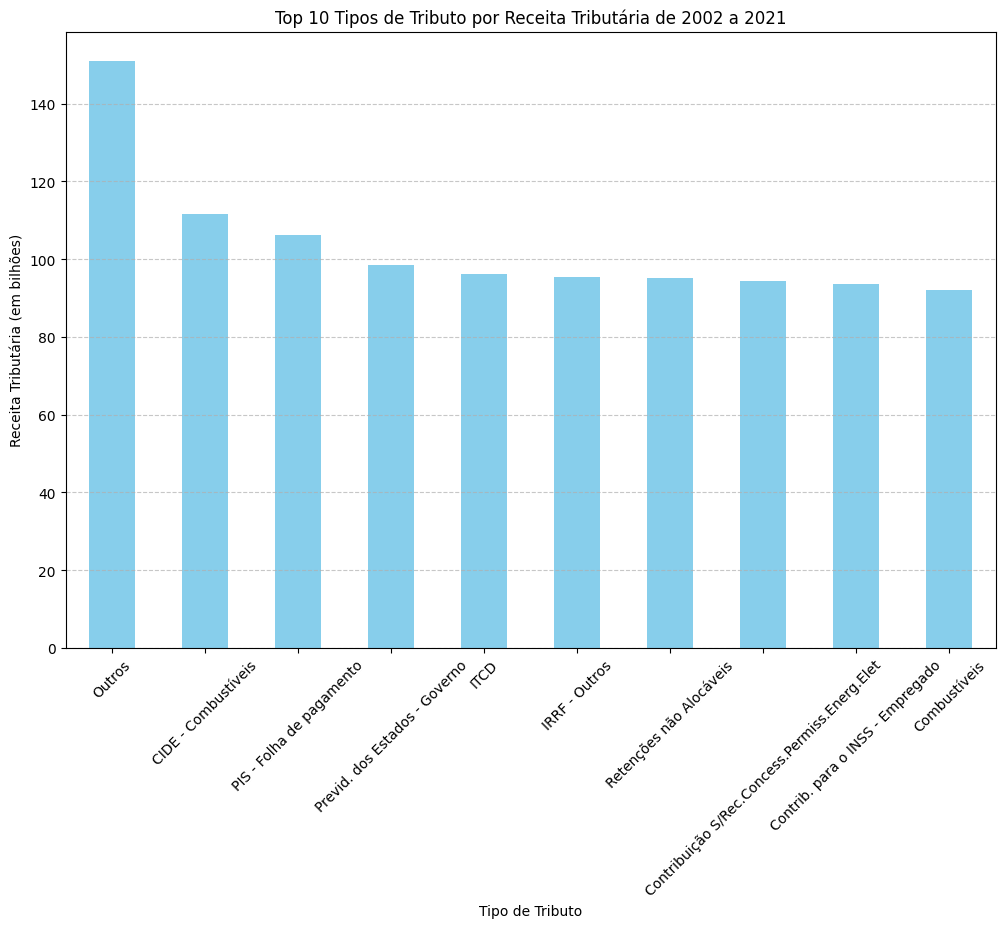

In [ ]:
receita_total_por_descricao = receita_total_por_descricao.sort_values(ascending=False)

top_10_tipos_tributo = receita_total_por_descricao.head(10)

plt.figure(figsize=(12, 8))
top_10_tipos_tributo.plot(kind='bar', color='skyblue')
plt.title('Top 10 Tipos de Tributo por Receita Tributária de 2002 a 2021')
plt.xlabel('Tipo de Tributo')
plt.ylabel('Receita Tributária (em bilhões)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Gráfico em pizza do percentual do tributo em relação ao valor total arrecadado

<ipython-input-99-89d424005414>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Porcentagem'] = (df_filtrado['Valor da Receita Tributária'] / receita_total) * 100


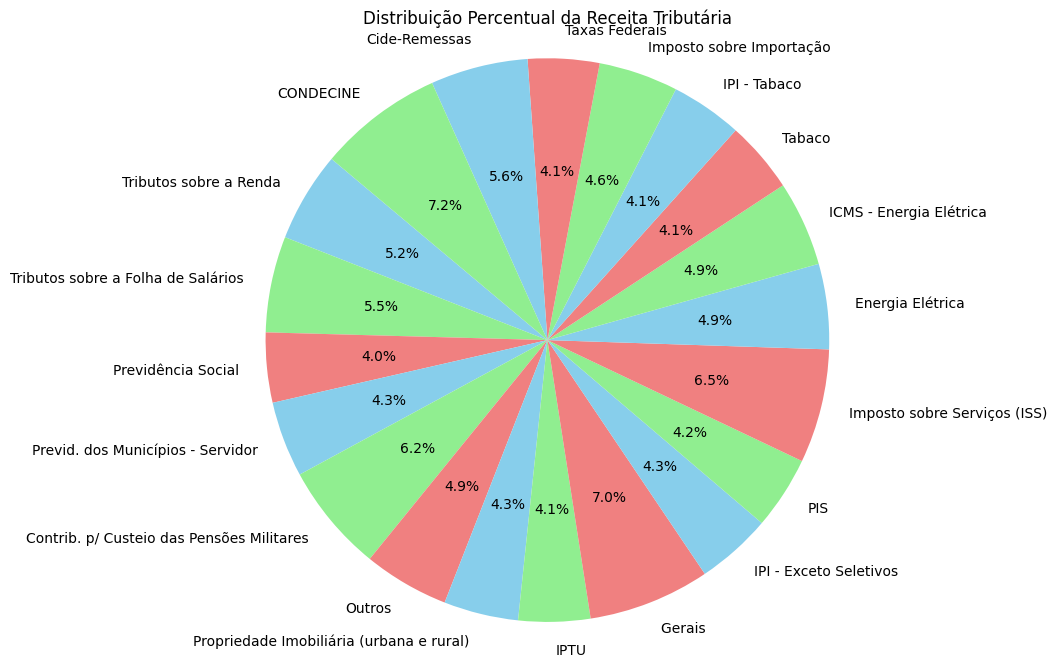

In [ ]:
df_filtrado = new_df[(new_df['Valor da Receita Tributária'] >= 0) & (new_df['Valor da Receita Tributária'] > 0)  & (new_df['Ano-calendário'] > 2020)]
receita_total = df_filtrado['Valor da Receita Tributária'].sum()

# Calcule as porcentagens
df_filtrado['Porcentagem'] = (df_filtrado['Valor da Receita Tributária'] / receita_total) * 100
df_filtrado = df_filtrado[df_filtrado['Porcentagem'] >= 2]

# Crie um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(df_filtrado['Porcentagem'], labels=df_filtrado['Descrição'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribuição Percentual da Receita Tributária')
plt.axis('equal')
plt.show()

In [ ]:
df_distribuido = pd.read_csv('/content/drive/MyDrive/data science/arrecadacao-estado.csv',
                      sep=';', encoding='utf-8')

In [ ]:
df_distribuido.head()

,Ano,Mes,UF,IMPOSTO SOBRE IMPORTACAO,IMPOSTO SOBRE EXPORTACAO,IPI - FUMO,IPI - BEBIDAS,IPI – AUTOMOVEIS,IPI - VINCULADO IMPORTACAO,IPI - OUTROS,...,REFIS,PAES,"RETENCAO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIARIA,RECEITA PREVIDENCIARIA – PROPRIA,RECEITA PREVIDENCIARIA - DEMAIS,ADMINISTRADAS POR OUTROS ORGAOS
0,2000,Janeiro,AC,231,0,292096,0,0,167,1558,...,NaN,NaN,NaN,NaN,20911,NaN,NaN,NaN,NaN,NaN
1,2000,Janeiro,AL,475088,33873,1329338,812470,0,141735,3676847,...,NaN,NaN,NaN,NaN,127189,NaN,NaN,NaN,NaN,NaN
2,2000,Janeiro,AM,11679405,0,1507146,1791471,27796,4414483,1800346,...,NaN,NaN,NaN,NaN,187988,NaN,NaN,NaN,NaN,NaN
3,2000,Janeiro,AP,24267,0,424862,1419,321,22333,12165,...,NaN,NaN,NaN,NaN,10769,NaN,NaN,NaN,NaN,NaN
4,2000,Janeiro,BA,10476457,13,5542123,11533707,0,7496476,23743858,...,NaN,NaN,NaN,NaN,536498,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_distribuido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 45 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Ano                                                           7668 non-null   int64  
 1   Mes                                                           7668 non-null   object 
 2   UF                                                            7668 non-null   object 
 3   IMPOSTO SOBRE IMPORTACAO                                      7668 non-null   object 
 4   IMPOSTO SOBRE EXPORTACAO                                      7668 non-null   object 
 5   IPI - FUMO                                                    7668 non-null   object 
 6   IPI - BEBIDAS                                                 7668 non-null   object 
 7   IPI – AUTOMOVEIS                                              7668 no

<ipython-input-103-02a7af56ede9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevante[colunas_impostos] = df_relevante[colunas_impostos].apply(pd.to_numeric, errors='coerce')


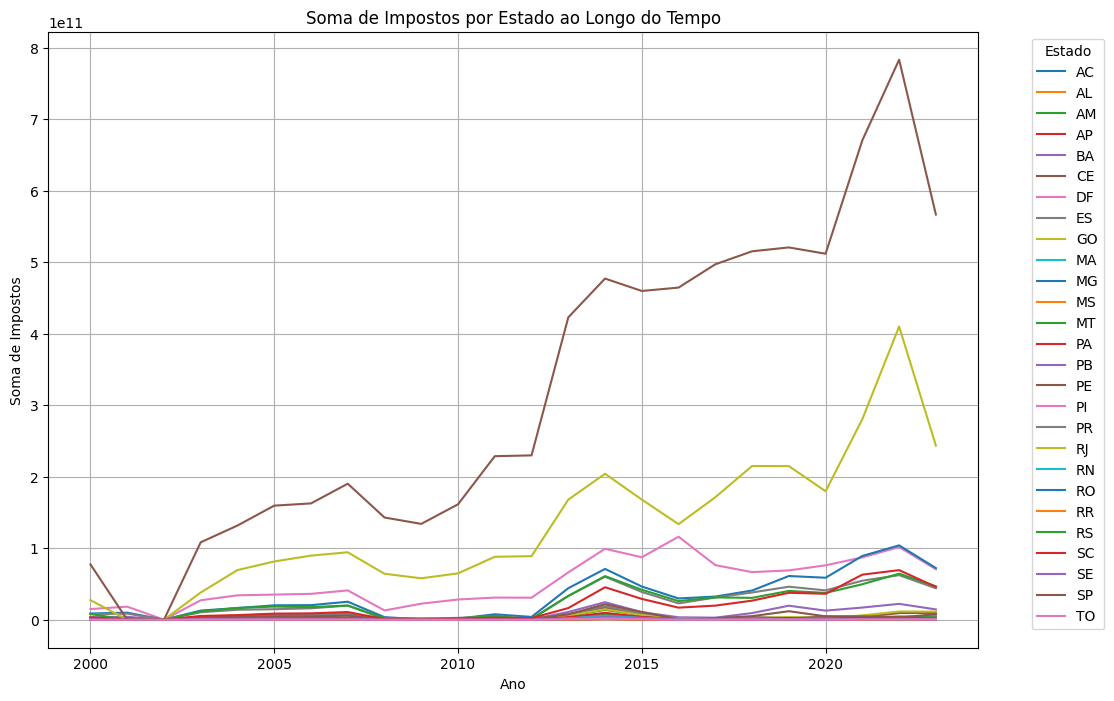

In [ ]:

colunas_impostos = [
    'IMPOSTO SOBRE IMPORTACAO', 'IMPOSTO SOBRE EXPORTACAO', 'IPI - FUMO',
    'IPI - BEBIDAS', 'IPI – AUTOMOVEIS', 'IPI - VINCULADO IMPORTACAO',
    'IPI - OUTROS', 'IRPF', 'IRPJ - ENTIDADES FINANCEIRAS', 'IRPJ - DEMAIS EMPRESAS',
    'IRRF - RENDIMENTOS DO TRABALHO', 'IRRF - RENDIMENTOS DO CAPITAL',
    'IRRF - REMESSAS P/ EXTERIOR', 'IRRF - OUTROS RENDIMENTOS',
    'IMPOSTO S/ OPERACOES FINANCEIRAS', 'IMPOSTO TERRITORIAL RURAL',
    'IMPOSTO PROVIS.S/ MOVIMENT. FINANC. - IPMF', 'CPMF', 'COFINS', 'COFINS - FINANCEIRAS',
    'COFINS - DEMAIS', 'CONTRIBUICAO PARA O PIS/PASEP',
    'CONTRIBUICAO PARA O PIS/PASEP - FINANCEIRAS', 'CONTRIBUICAO PARA O PIS/PASEP - DEMAIS',
    'CSLL', 'CSLL - FINANCEIRAS', 'CSLL - DEMAIS', 'CIDE-COMBUSTIVEIS (parc. nao dedutivel)',
    'CIDE-COMBUSTIVEIS', 'CONTRIBUICAO PLANO SEG. SOC. SERVIDORES',
    'CPSSS - Contrib. p/ o Plano de Segurid. Social Serv. Publico',
    'CONTRIBUICOES PARA FUNDAF', 'REFIS', 'PAES', 'RETENCAO NA FONTE - LEI 10.833, Art. 30',
    'PAGAMENTO UNIFICADO', 'OUTRAS RECEITAS ADMINISTRADAS', 'DEMAIS RECEITAS',
    'RECEITA PREVIDENCIARIA', 'RECEITA PREVIDENCIARIA – PROPRIA', 'RECEITA PREVIDENCIARIA - DEMAIS',
    'ADMINISTRADAS POR OUTROS ORGAOS'
]

# Crie um novo DataFrame com as colunas relevantes
df_relevante = df_distribuido[['Ano', 'UF'] + colunas_impostos]

# Converta as colunas de impostos para números (se necessário)
df_relevante[colunas_impostos] = df_relevante[colunas_impostos].apply(pd.to_numeric, errors='coerce')

# Agrupe os dados por estado e ano e calcule a soma dos impostos
soma_impostos_por_estado = df_relevante.groupby(['UF', 'Ano'])[colunas_impostos].sum().reset_index()

# Crie um gráfico de linha para representar a soma dos impostos ao longo do tempo para cada estado
plt.figure(figsize=(12, 8))
for estado in df_distribuido['UF'].unique():
    dados_estado = soma_impostos_por_estado[soma_impostos_por_estado['UF'] == estado]
    plt.plot(dados_estado['Ano'], dados_estado[colunas_impostos].sum(axis=1), label=estado)

plt.title('Soma de Impostos por Estado ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Soma de Impostos')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()